訓練網路

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def load_image(path):
    with open(path, 'rb') as file:
        file.read(16)
        return np.fromfile(file, dtype=np.uint8).reshape(-1, 784) / 255
        
def load_label(path):
    with open(path, 'rb') as file:
        file.read(8)
        return np.fromfile(file, dtype=np.uint8)


training_images = load_image('train-images.idx3-ubyte')
training_labels = load_label('train-labels.idx1-ubyte')
testing_images = load_image('t10k-images.idx3-ubyte')
testing_labels = load_label('t10k-labels.idx1-ubyte')

class NeuralNetworks:
    def __init__(self):
        self.dim = [784] + [6]*2 + [10]
        
        # 初始化參數
        self.w = []
        self.b = []
        for i in range(len(self.dim)-1):
            self.w.append((2 * np.random.rand(self.dim[i+1], self.dim[i]) - 1))
            self.b.append(np.zeros((self.dim[i+1], 1)))
        

        self.batch_size = 10
        
        self.learning_rate = 0.1
        
        self.identity = np.identity(10)
        
        self.batch_dCdw = [0 for _ in range(len(self.dim) - 1)]
        self.batch_dCdb = [0 for _ in range(len(self.dim) - 1)]
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_prime(self, z):
        return np.exp(-z) / ((1 + np.exp(-z)) ** 2)
    
    def ReLU(self, z):
        return np.maximum(z, 0)
    
    def ReLU_prime(self, z):
        return np.where(z > np.zeros_like(z), 1, 0)
    
    def forward_propagation(self, image):
        self.x = [image.reshape(-1, 1)]
        self.z = []
        
        for i in range(len(self.dim) - 1):
            self.z.append(np.dot(self.w[i], self.x[i]) + self.b[i])
            self.x.append(self.sigmoid(self.z[i]))

        return self.x[-1]
    
    def backward_propagation(self, label):
        yhat = self.identity[label].reshape(10, 1)

        dCdb = [(self.x[-1] - yhat) * self.sigmoid_prime(self.z[-1])]
        dCdw = [np.dot(dCdb[0], self.x[-2].T)]
        
        for i in range(len(self.dim)-2, 0, -1):
            dCdb.insert(0, np.dot(self.w[i].T, dCdb[0]) * self.sigmoid_prime(self.z[i-1]))
            dCdw.insert(0, np.dot(dCdb[0], self.x[i-1].T))
    
        for i in range(len(self.dim) - 1):
            self.batch_dCdw[i] += dCdw[i]
            self.batch_dCdb[i] += dCdb[i]
    
    def train(self):
        order = np.arange(6000)
        np.random.shuffle(order)
        
        batch_cnt = 0
        
        for i in order:
            image = training_images[i]
            label = training_labels[i]

            self.forward_propagation(image)
            self.backward_propagation(label)
            
            batch_cnt += 1
            
            if batch_cnt == self.batch_size:
                for dim in range(len(self.dim)-1):
                    self.w[dim] -= self.learning_rate * self.batch_dCdw[dim] / self.batch_size
                    self.b[dim] -= self.learning_rate * self.batch_dCdb[dim] / self.batch_size

                self.batch_dCdw = [0 for i in range(len(self.dim) - 1)]
                self.batch_dCdb = [0 for i in range(len(self.dim) - 1)]
                
                batch_cnt = 0

    def cost(self, images, labels):
        num_of_image, _ = images.shape
        loss = 0
        
        for i in range(num_of_image):
            image = images[i]
            label = labels[i]

            yhat = self.identity[label].reshape(10, 1)

            loss += ((self.forward_propagation(image) - yhat) ** 2).sum()
    
        print(f'cost: {loss}')
    
    def accuracy(self, images, labels):
        num_of_image, _ = images.shape
        correct = 0
        
        for i in range(num_of_image):
            image = images[i]
            label = labels[i]
            
            if self.forward_propagation(image).argmax() == label:
                correct += 1
        
        print(f'accuracy: {correct / num_of_image * 100}%')


nn = NeuralNetworks()

epoch = 200
for e in range(epoch):
    nn.train()

nn.accuracy(training_images[:600], training_labels[:600])
nn.accuracy(testing_images[:500], testing_labels[:500])

accuracy: 92.5%
accuracy: 83.0%


In [21]:
[1,3,4][:-1]

[1, 3]

驗證測試集

predict: 3


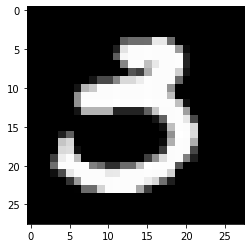

In [17]:
i = np.random.randint(10000)
image = testing_images[i]

label = nn.forward_propagation(image).argmax()
print(f'predict: {label}')

image = image.reshape((28,28))
plt.imshow(image, cmap='gray')

# 參考資料

[YouTube-Neural Networks Demystified](https://www.youtube.com/playlist?list=PLiaHhY2iBX9hdHaRr6b7XevZtgZRa1PoU)

[YouTube-Neural networks](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)

[bilibili-大野喵渣](https://space.bilibili.com/28496477/video?tid=0&page=1&keyword=&order=pubdate)

[GitHub-lihang-code](https://github.com/fengdu78/lihang-code)

In [20]:
a=np.array([[1,2],[3,4]])
b=np.array([[1,3,4]])

a[0]











array([1, 2])